In [400]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [401]:
bmdata = pd.read_csv('/Users/aayushmishra/Downloads/SystemSellAndBuyPrices-2024-09-01T00_00_00.000Z-2024-09-08T00_00_00.000Z.csv')

In [402]:
dayahead = pd.read_excel('/Users/aayushmishra/Downloads/DayAheadPrices.xlsx',sheet_name = 'Sheet2')

In [403]:
bmdata.head()

,SettlementDate,SettlementPeriod,StartTime,CreatedDateTime,SystemSellPrice,SystemBuyPrice,BsadDefaulted,PriceDerivationCode,ReserveScarcityPrice,NetImbalanceVolume,...,ReplacementPrice,ReplacementPriceReferenceVolume,TotalAcceptedOfferVolume,TotalAcceptedBidVolume,TotalAdjustmentSellVolume,TotalAdjustmentBuyVolume,TotalSystemTaggedAcceptedOfferVolume,TotalSystemTaggedAcceptedBidVolume,TotalSystemTaggedAdjustmentSellVolume,TotalSystemTaggedAdjustmentBuyVolume
0,2024-09-01,3,2024-09-01T00:00:00Z,2024-09-02T00:44:22Z,57.12,57.12,False,N,0.0,-226.702500,...,NaN,NaN,903.350000,-1254.545833,-500.0,624.560,903.350000,-1254.545833,-499.0,624.560
1,2024-09-01,4,2024-09-01T00:30:00Z,2024-09-02T01:14:21Z,58.04,58.04,False,N,0.0,-118.244190,...,NaN,NaN,963.350000,-1167.251190,-500.0,585.582,963.350000,-1167.251190,-499.0,585.582
2,2024-09-01,5,2024-09-01T01:00:00Z,2024-09-02T01:44:19Z,96.50,96.50,False,P,0.0,159.344292,...,NaN,NaN,1201.252101,-1044.092560,-500.0,501.791,1200.252101,-1044.092560,-500.0,501.791
3,2024-09-01,6,2024-09-01T01:30:00Z,2024-09-02T02:14:19Z,96.00,96.00,False,P,0.0,43.721181,...,NaN,NaN,1140.496637,-1044.642039,-500.0,447.500,1139.496637,-1044.642039,-500.0,447.500
4,2024-09-01,7,2024-09-01T02:00:00Z,2024-09-02T02:44:21Z,96.50,96.50,False,P,0.0,139.535991,...,NaN,NaN,1153.611232,-961.575152,-500.0,447.500,1152.611232,-961.575152,-500.0,447.500


In [404]:
dayahead.head()

,Date,Hour,Price(GBP/kwH)
0,2024-01-09,00:00 - 01:00,"34,50"
1,2024-01-09,01:00 - 02:00,"44,52"
2,2024-01-09,02:00 - 03:00,"44,49"
3,2024-01-09,03:00 - 04:00,"42,23"
4,2024-01-09,04:00 - 05:00,"41,48"


In [405]:
bmdata.columns

Index(['SettlementDate', 'SettlementPeriod', 'StartTime', 'CreatedDateTime',
       'SystemSellPrice', 'SystemBuyPrice', 'BsadDefaulted',
       'PriceDerivationCode', 'ReserveScarcityPrice', 'NetImbalanceVolume',
       'SellPriceAdjustment', 'BuyPriceAdjustment', 'ReplacementPrice',
       'ReplacementPriceReferenceVolume', 'TotalAcceptedOfferVolume',
       'TotalAcceptedBidVolume', 'TotalAdjustmentSellVolume',
       'TotalAdjustmentBuyVolume', 'TotalSystemTaggedAcceptedOfferVolume',
       'TotalSystemTaggedAcceptedBidVolume',
       'TotalSystemTaggedAdjustmentSellVolume',
       'TotalSystemTaggedAdjustmentBuyVolume'],
      dtype='object')

In [406]:
dayahead['Price(GBP/MWh)'] = dayahead['Price(GBP/kwH)'].str.replace(',', '.').astype(float)
dayahead.drop(columns=['Price(GBP/kwH)'], inplace=True)

In [407]:
dayahead.head()

,Date,Hour,Price(GBP/MWh)
0,2024-01-09,00:00 - 01:00,34.50
1,2024-01-09,01:00 - 02:00,44.52
2,2024-01-09,02:00 - 03:00,44.49
3,2024-01-09,03:00 - 04:00,42.23
4,2024-01-09,04:00 - 05:00,41.48


In [408]:
dayahead['Date'] = dayahead['Date'].dt.strftime('%Y-%d-%m')
dayahead['start_hour'] = dayahead['Hour'].str.split(' - ').str[0]

# Step 2: Combine 'date' and 'start_hour' into a new 'datetime' column
dayahead['datetime'] = pd.to_datetime(dayahead['Date'] + ' ' + dayahead['start_hour'],dayfirst=True)

# Drop unnecessary columns if needed
dayahead = dayahead.drop(['start_hour'], axis=1)

# Now 'datetime' column will have the correct format


In [228]:
dayahead.head()

,Date,Hour,Price(GBP/MWh),datetime
0,2024-09-01,00:00 - 01:00,34.50,2024-09-01 00:00:00
1,2024-09-01,01:00 - 02:00,44.52,2024-09-01 01:00:00
2,2024-09-01,02:00 - 03:00,44.49,2024-09-01 02:00:00
3,2024-09-01,03:00 - 04:00,42.23,2024-09-01 03:00:00
4,2024-09-01,04:00 - 05:00,41.48,2024-09-01 04:00:00


In [409]:
# Step 1: Remove the 'date' and 'hour' columns
dayahead = dayahead.drop(['Date', 'Hour'], axis=1)

# Step 2: Rearrange the 'datetime' and 'price' columns
# Assuming the price column is named 'Price(GBP/MWh)'
dayahead = dayahead[['datetime', 'Price(GBP/MWh)'] + [col for col in dayahead.columns if col not in ['datetime', 'Price(GBP/MWh)']]]

# Check the updated dataframe
dayahead


,datetime,Price(GBP/MWh)
0,2024-09-01 00:00:00,34.50
1,2024-09-01 01:00:00,44.52
2,2024-09-01 02:00:00,44.49
3,2024-09-01 03:00:00,42.23
4,2024-09-01 04:00:00,41.48
...,...,...
163,2024-09-07 19:00:00,44.27
164,2024-09-07 20:00:00,43.82
165,2024-09-07 21:00:00,43.30
166,2024-09-07 22:00:00,44.19


In [410]:
columns_to_keep = ['SettlementDate','StartTime', 'SettlementPeriod', 
                   'SystemSellPrice', 'SystemBuyPrice']

# Drop all other columns
bmdata_cleaned = bmdata[columns_to_keep]

In [411]:
bmdata_cleaned

,SettlementDate,StartTime,SettlementPeriod,SystemSellPrice,SystemBuyPrice
0,2024-09-01,2024-09-01T00:00:00Z,3,57.12,57.12
1,2024-09-01,2024-09-01T00:30:00Z,4,58.04,58.04
2,2024-09-01,2024-09-01T01:00:00Z,5,96.50,96.50
3,2024-09-01,2024-09-01T01:30:00Z,6,96.00,96.00
4,2024-09-01,2024-09-01T02:00:00Z,7,96.50,96.50
...,...,...,...,...,...
332,2024-09-07,2024-09-07T22:00:00Z,47,64.29,64.29
333,2024-09-07,2024-09-07T22:30:00Z,48,83.69,83.69
334,2024-09-08,2024-09-07T23:00:00Z,1,87.51,87.51
335,2024-09-08,2024-09-07T23:30:00Z,2,69.27,69.27


In [412]:
bmdata_cleaned.rename(columns={'SystemBuyPrice': 'Price(GBP/MWh)'}, inplace=True)

# Drop 'SystemSellPrice' column
bmdata_cleaned.drop(columns=['SystemSellPrice'], inplace=True)

# To check if the changes have been applied
bmdata_cleaned

/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/1262014366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmdata_cleaned.rename(columns={'SystemBuyPrice': 'Price(GBP/MWh)'}, inplace=True)
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/1262014366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmdata_cleaned.drop(columns=['SystemSellPrice'], inplace=True)


,SettlementDate,StartTime,SettlementPeriod,Price(GBP/MWh)
0,2024-09-01,2024-09-01T00:00:00Z,3,57.12
1,2024-09-01,2024-09-01T00:30:00Z,4,58.04
2,2024-09-01,2024-09-01T01:00:00Z,5,96.50
3,2024-09-01,2024-09-01T01:30:00Z,6,96.00
4,2024-09-01,2024-09-01T02:00:00Z,7,96.50
...,...,...,...,...
332,2024-09-07,2024-09-07T22:00:00Z,47,64.29
333,2024-09-07,2024-09-07T22:30:00Z,48,83.69
334,2024-09-08,2024-09-07T23:00:00Z,1,87.51
335,2024-09-08,2024-09-07T23:30:00Z,2,69.27


In [413]:
bmdata_cleaned['StartTime'] = pd.to_datetime(bmdata_cleaned['StartTime'])

/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/1812868488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmdata_cleaned['StartTime'] = pd.to_datetime(bmdata_cleaned['StartTime'])


In [414]:
bmdata_cleaned

,SettlementDate,StartTime,SettlementPeriod,Price(GBP/MWh)
0,2024-09-01,2024-09-01 00:00:00+00:00,3,57.12
1,2024-09-01,2024-09-01 00:30:00+00:00,4,58.04
2,2024-09-01,2024-09-01 01:00:00+00:00,5,96.50
3,2024-09-01,2024-09-01 01:30:00+00:00,6,96.00
4,2024-09-01,2024-09-01 02:00:00+00:00,7,96.50
...,...,...,...,...
332,2024-09-07,2024-09-07 22:00:00+00:00,47,64.29
333,2024-09-07,2024-09-07 22:30:00+00:00,48,83.69
334,2024-09-08,2024-09-07 23:00:00+00:00,1,87.51
335,2024-09-08,2024-09-07 23:30:00+00:00,2,69.27


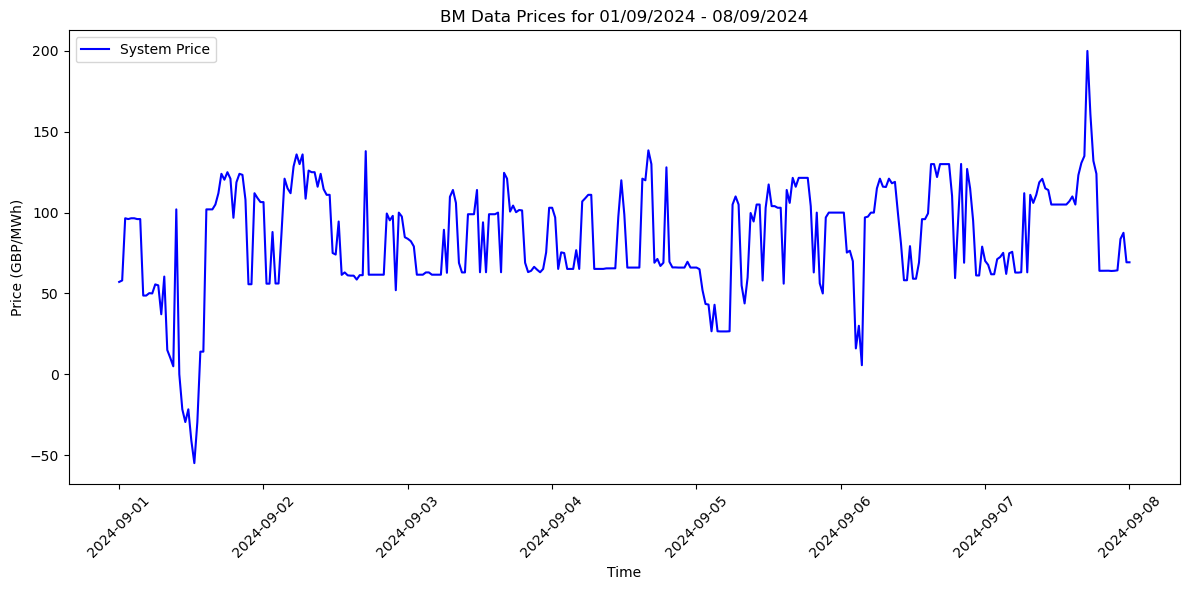

In [415]:
plt.figure(figsize=(12, 6))
plt.plot(bmdata_cleaned['StartTime'], bmdata_cleaned['Price(GBP/MWh)'], label='System Price', color='blue')
plt.title('BM Data Prices for 01/09/2024 - 08/09/2024')
plt.xlabel('Time')
plt.ylabel('Price (GBP/MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

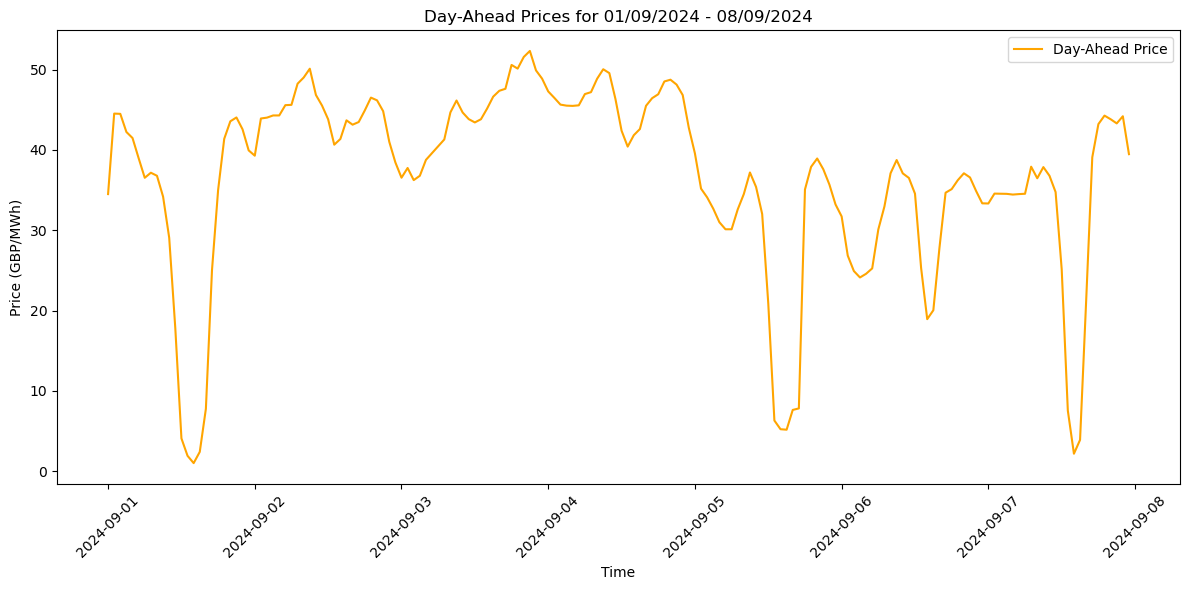

In [416]:
plt.figure(figsize=(12, 6))
plt.plot(dayahead['datetime'], dayahead['Price(GBP/MWh)'], label='Day-Ahead Price', color='orange')
plt.title('Day-Ahead Prices for 01/09/2024 - 08/09/2024')
plt.xlabel('Time')
plt.ylabel('Price (GBP/MWh)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [417]:
dayahead.describe()

,Price(GBP/MWh)
count,168.000000
mean,36.683750
std,11.671988
min,1.010000
25%,34.375000
50%,38.950000
75%,44.662500
max,52.320000


In [418]:
bmdata_cleaned.describe()

,SettlementPeriod,Price(GBP/MWh)
count,337.000000,337.000000
mean,24.436202,83.587752
std,13.902817,33.466219
min,1.000000,-54.950000
25%,12.000000,63.000000
50%,24.000000,84.780000
75%,36.000000,107.000000
max,48.000000,200.000000


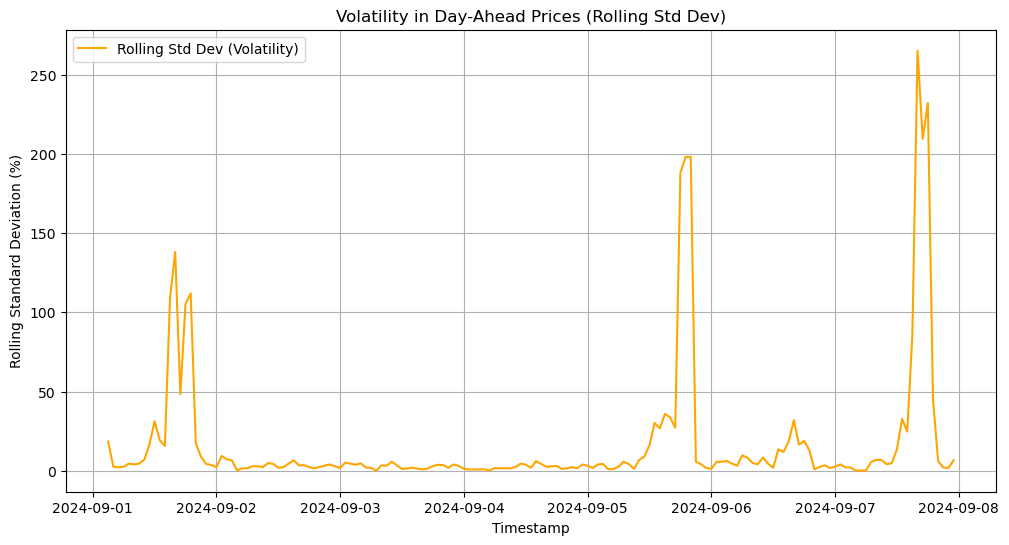

               datetime  Price(GBP/MWh)  Rolling Std Dev
3   2024-09-01 03:00:00           42.23        18.425364
4   2024-09-01 04:00:00           41.48         2.548159
5   2024-09-01 05:00:00           38.97         2.241102
6   2024-09-01 06:00:00           36.53         2.531079
7   2024-09-01 07:00:00           37.16         4.551182
..                  ...             ...              ...
162 2024-09-07 18:00:00           43.21       232.156554
163 2024-09-07 19:00:00           44.27        44.967641
164 2024-09-07 20:00:00           43.82         5.945479
165 2024-09-07 21:00:00           43.30         2.054080
167 2024-09-07 23:00:00           39.47         6.619122

[123 rows x 3 columns]


In [419]:
# Assuming 'dayahead' DataFrame has a 'datetime' and 'Price(GBP/MWh)' column
# Step 1: Calculate percentage change in price
dayahead['Price Change (%)'] = dayahead['Price(GBP/MWh)'].pct_change() * 100

# Step 2: Compute rolling standard deviation (use a window of, e.g., 3 hours)
dayahead['Rolling Std Dev'] = dayahead['Price Change (%)'].rolling(window=3).std()

# Step 3: Plot the rolling standard deviation to visualize volatility
plt.figure(figsize=(12,6))
plt.plot(dayahead['datetime'], dayahead['Rolling Std Dev'], label='Rolling Std Dev (Volatility)', color='orange')
plt.title('Volatility in Day-Ahead Prices (Rolling Std Dev)')
plt.xlabel('Timestamp')
plt.ylabel('Rolling Standard Deviation (%)')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Identify timestamps where volatility (rolling std dev) is above a threshold
# Example: Volatility spikes where rolling standard deviation is greater than 2% (adjust threshold as necessary)
volatility_spikes = dayahead[dayahead['Rolling Std Dev'] > 2]

# Display the timestamps and corresponding prices during the volatility spikes
print(volatility_spikes[['datetime', 'Price(GBP/MWh)', 'Rolling Std Dev']])


In [420]:
dayahead['date'] = dayahead['datetime'].dt.date

# Step 2: Group the data by date
grouped = dayahead.groupby('date').agg(
    max_rolling_std=('Rolling Std Dev', 'max'),  # Max rolling std dev
    min_rolling_std=('Rolling Std Dev', 'min'),  # Mean rolling std dev
    avg_rolling_std=('Rolling Std Dev', 'mean'),  # Average (mean) rolling std dev
    
    max_price_change=('Price Change (%)', 'max'),  # Max price change
    min_price_change=('Price Change (%)', 'min'),  # Mean price change
    avg_price_change=('Price Change (%)', 'mean')  # Average (mean) price change
).reset_index()

In [421]:
grouped

,date,max_rolling_std,min_rolling_std,avg_rolling_std,max_price_change,min_price_change,avg_price_change
0,2024-09-01,138.090677,2.241102,32.181691,222.406639,-76.983680,17.836794
1,2024-09-02,9.335094,0.308388,3.536078,11.787169,-8.500669,-0.058025
2,2024-09-03,5.715193,0.048298,2.808858,8.159806,-4.942768,1.059250
3,2024-09-04,6.138995,0.219376,2.232723,6.784038,-8.712364,-0.483494
4,2024-09-05,198.165967,1.021248,33.786572,348.465473,-69.736211,10.197577
5,2024-09-06,31.954517,0.935047,8.397733,38.722555,-26.772793,0.944428
6,2024-09-07,265.139268,0.126251,40.224439,444.358974,-71.125828,18.571585


/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/829175293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmdata_cleaned['Price Change (%)'] = bmdata_cleaned['Price(GBP/MWh)'].pct_change() * 100
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/829175293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmdata_cleaned['Rolling Std Dev'] = bmdata_cleaned['Price Change (%)'].rolling(window=6).std()


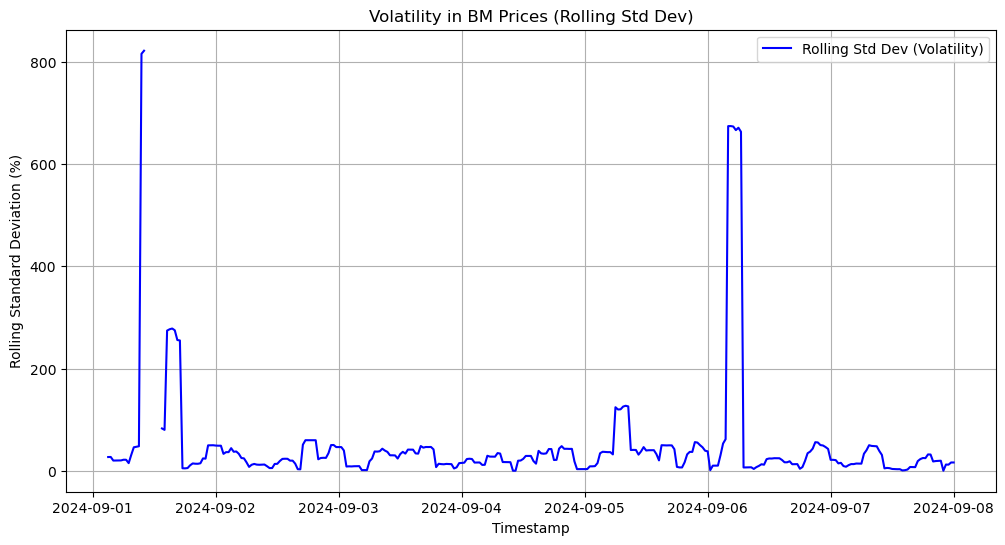

In [422]:
bmdata_cleaned['Price Change (%)'] = bmdata_cleaned['Price(GBP/MWh)'].pct_change() * 100

# Step 2: Compute rolling standard deviation (using a window of 6 half-hour periods = 3 hours)
bmdata_cleaned['Rolling Std Dev'] = bmdata_cleaned['Price Change (%)'].rolling(window=6).std()

# Step 3: Plot the rolling standard deviation to visualize volatility
plt.figure(figsize=(12,6))
plt.plot(bmdata_cleaned['StartTime'], bmdata_cleaned['Rolling Std Dev'], label='Rolling Std Dev (Volatility)', color='blue')
plt.title('Volatility in BM Prices (Rolling Std Dev)')
plt.xlabel('Timestamp')
plt.ylabel('Rolling Standard Deviation (%)')
plt.legend()
plt.grid(True)
plt.show()


In [423]:
# Check for NaN values in 'Price(GBP/MWh)'
print(bmdata_cleaned['Price(GBP/MWh)'].isnull().sum())

# Check for zero values in 'Price(GBP/MWh)'
zero_prices = bmdata_cleaned[bmdata_cleaned['Price(GBP/MWh)'] == 0]
print(zero_prices)

0
   SettlementDate                 StartTime  SettlementPeriod  Price(GBP/MWh)  \
20     2024-09-01 2024-09-01 10:00:00+00:00                23             0.0   

    Price Change (%)  Rolling Std Dev  
20            -100.0       821.738922  


In [244]:
# Assuming bmdata is your original DataFrame
# Create a copy of the original DataFrame
bmdata_copy = bmdata_cleaned.copy()

# Step 1: Set 'StartTime' as the index for resampling
bmdata_copy.set_index('StartTime', inplace=True)

# Step 2: Ensure 'Price(GBP/MWh)' is of numeric type
bmdata_copy['Price(GBP/MWh)'] = pd.to_numeric(bmdata_copy['Price(GBP/MWh)'], errors='coerce')

# Step 3: Resample the DataFrame to hourly frequency and apply mean to 'Price(GBP/MWh)'
bmdata_hourly = bmdata_copy.resample('h')['Price(GBP/MWh)'].mean()

# Step 4: Reset index to get a clean DataFrame with hourly resampled data
bmdata_hourly = bmdata_hourly.reset_index()

# Display the result




In [424]:
bmdata_hourly


,StartTime,Price(GBP/MWh),Price Change (%),Rolling Std Dev
0,2024-09-01 00:00:00,57.58000,NaN,NaN
1,2024-09-01 01:00:00,96.25000,67.158736,NaN
2,2024-09-01 02:00:00,96.50000,0.259740,NaN
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568
...,...,...,...,...
164,2024-09-07 20:00:00,64.05000,0.078125,25.150993
165,2024-09-07 21:00:00,63.96000,-0.140515,28.849710
166,2024-09-07 22:00:00,73.99000,15.681676,9.072489
167,2024-09-07 23:00:00,78.39000,5.946750,7.980866


In [425]:
dayahead

,datetime,Price(GBP/MWh),Price Change (%),Rolling Std Dev,date
0,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01
1,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01
2,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01
3,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01
4,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01
...,...,...,...,...,...
163,2024-09-07 19:00:00,44.27,2.453136,44.967641,2024-09-07
164,2024-09-07 20:00:00,43.82,-1.016490,5.945479,2024-09-07
165,2024-09-07 21:00:00,43.30,-1.186673,2.054080,2024-09-07
166,2024-09-07 22:00:00,44.19,2.055427,1.824685,2024-09-07


In [426]:

bmdata_hourly['Price Change (%)'] = bmdata_hourly['Price(GBP/MWh)'].pct_change() * 100


bmdata_hourly['Rolling Std Dev'] = bmdata_hourly['Price Change (%)'].rolling(window=3).std()

In [427]:
bmdata_hourly

,StartTime,Price(GBP/MWh),Price Change (%),Rolling Std Dev
0,2024-09-01 00:00:00,57.58000,NaN,NaN
1,2024-09-01 01:00:00,96.25000,67.158736,NaN
2,2024-09-01 02:00:00,96.50000,0.259740,NaN
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568
...,...,...,...,...
164,2024-09-07 20:00:00,64.05000,0.078125,25.150993
165,2024-09-07 21:00:00,63.96000,-0.140515,28.849710
166,2024-09-07 22:00:00,73.99000,15.681676,9.072489
167,2024-09-07 23:00:00,78.39000,5.946750,7.980866


In [428]:
bmdata_hourly['StartTime'] = pd.to_datetime(bmdata_hourly['StartTime']).dt.tz_localize(None)

In [429]:
bmdata_hourly

,StartTime,Price(GBP/MWh),Price Change (%),Rolling Std Dev
0,2024-09-01 00:00:00,57.58000,NaN,NaN
1,2024-09-01 01:00:00,96.25000,67.158736,NaN
2,2024-09-01 02:00:00,96.50000,0.259740,NaN
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568
...,...,...,...,...
164,2024-09-07 20:00:00,64.05000,0.078125,25.150993
165,2024-09-07 21:00:00,63.96000,-0.140515,28.849710
166,2024-09-07 22:00:00,73.99000,15.681676,9.072489
167,2024-09-07 23:00:00,78.39000,5.946750,7.980866


In [430]:
dayahead

,datetime,Price(GBP/MWh),Price Change (%),Rolling Std Dev,date
0,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01
1,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01
2,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01
3,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01
4,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01
...,...,...,...,...,...
163,2024-09-07 19:00:00,44.27,2.453136,44.967641,2024-09-07
164,2024-09-07 20:00:00,43.82,-1.016490,5.945479,2024-09-07
165,2024-09-07 21:00:00,43.30,-1.186673,2.054080,2024-09-07
166,2024-09-07 22:00:00,44.19,2.055427,1.824685,2024-09-07


In [431]:
bmdata_hourly['StartTime'] = pd.to_datetime(bmdata_hourly['StartTime'], dayfirst=True)

# Convert 'datetime' in 'dayahead' to ensure both are datetime type
dayahead['datetime'] = pd.to_datetime(dayahead['datetime'],dayfirst=True)

In [432]:
dayahead

,datetime,Price(GBP/MWh),Price Change (%),Rolling Std Dev,date
0,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01
1,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01
2,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01
3,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01
4,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01
...,...,...,...,...,...
163,2024-09-07 19:00:00,44.27,2.453136,44.967641,2024-09-07
164,2024-09-07 20:00:00,43.82,-1.016490,5.945479,2024-09-07
165,2024-09-07 21:00:00,43.30,-1.186673,2.054080,2024-09-07
166,2024-09-07 22:00:00,44.19,2.055427,1.824685,2024-09-07


In [433]:
merged_df = pd.merge(bmdata_hourly, dayahead, left_on='StartTime', right_on='datetime')

x is bm,y is dayahead

In [434]:
merged_df

,StartTime,Price(GBP/MWh)_x,Price Change (%)_x,Rolling Std Dev_x,datetime,Price(GBP/MWh)_y,Price Change (%)_y,Rolling Std Dev_y,date
0,2024-09-01 00:00:00,57.58000,NaN,NaN,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01
1,2024-09-01 01:00:00,96.25000,67.158736,NaN,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01
2,2024-09-01 02:00:00,96.50000,0.259740,NaN,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01
...,...,...,...,...,...,...,...,...,...
163,2024-09-07 19:00:00,64.00000,-50.000000,44.752088,2024-09-07 19:00:00,44.27,2.453136,44.967641,2024-09-07
164,2024-09-07 20:00:00,64.05000,0.078125,25.150993,2024-09-07 20:00:00,43.82,-1.016490,5.945479,2024-09-07
165,2024-09-07 21:00:00,63.96000,-0.140515,28.849710,2024-09-07 21:00:00,43.30,-1.186673,2.054080,2024-09-07
166,2024-09-07 22:00:00,73.99000,15.681676,9.072489,2024-09-07 22:00:00,44.19,2.055427,1.824685,2024-09-07


# Backtest and OS Split

In [435]:
# Set the number of days for backtesting and out-of-sample testing
backtest_days = 5  # Days to use for backtesting
os_days = 2        # Days to use for out-of-sample testing

# Calculate the number of rows in each dataset
total_rows = len(merged_df)

# Assuming you have hourly data, calculate rows for backtest and OS
rows_per_day = 24  # Adjust if the data is at different frequencies (e.g., half-hourly)
backtest_rows = backtest_days * rows_per_day
os_rows = os_days * rows_per_day

# Divide the datasets
merged_backtest = merged_df.iloc[:backtest_rows]
merged_os = merged_df.iloc[backtest_rows:backtest_rows + os_rows]


# Print shapes to confirm the split
print("merged_backtest Shape:", merged_backtest.shape)
print("merged_os Shape:", merged_os.shape)

merged_backtest Shape: (120, 9)
merged_os Shape: (48, 9)


# IS Test

In [436]:
merged_backtest

,StartTime,Price(GBP/MWh)_x,Price Change (%)_x,Rolling Std Dev_x,datetime,Price(GBP/MWh)_y,Price Change (%)_y,Rolling Std Dev_y,date
0,2024-09-01 00:00:00,57.58000,NaN,NaN,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01
1,2024-09-01 01:00:00,96.25000,67.158736,NaN,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01
2,2024-09-01 02:00:00,96.50000,0.259740,NaN,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01
...,...,...,...,...,...,...,...,...,...
115,2024-09-05 19:00:00,83.50000,-31.275720,18.761321,2024-09-05 19:00:00,37.89,8.041061,198.165967,2024-09-05
116,2024-09-05 20:00:00,78.11000,-6.455090,16.512130,2024-09-05 20:00:00,38.93,2.744788,198.090730,2024-09-05
117,2024-09-05 21:00:00,73.50000,-5.901933,14.492520,2024-09-05 21:00:00,37.59,-3.442076,5.747321,2024-09-05
118,2024-09-05 22:00:00,100.00000,36.054422,24.384764,2024-09-05 22:00:00,35.68,-5.081139,4.127326,2024-09-05


In [452]:
# Calculate the 3-period moving average of the day-ahead price changes
merged_backtest['Moving_Avg'] = merged_backtest['Price Change (%)_y'].rolling(window=5).mean()
std_dev_fraction = 0.25
merged_backtest['Upper_Band'] = merged_backtest['Moving_Avg'] + std_dev_fraction * merged_backtest['Price Change (%)_y']
merged_backtest['Lower_Band'] = merged_backtest['Moving_Avg'] - std_dev_fraction * merged_backtest['Price Change (%)_y']
# Initialize signals
signals = []

for i in range(len(merged_backtest)):
    if i < 3:  # Skip the first 2 entries where moving average is not available
        signals.append(0)  # No signal when there's not enough data
    else:
        if merged_backtest['Price Change (%)_x'].iloc[i] < merged_backtest['Lower_Band'].iloc[i]:
            signals.append(1)  # Buy signal
        elif merged_backtest['Price Change (%)_x'].iloc[i] > merged_backtest['Upper_Band'].iloc[i]:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)  # Hold signal

# Add signals to the DataFrame
merged_backtest['signals'] = signals

# Display the updated DataFrame with moving average and signals
print(merged_backtest[['Price Change (%)_x', 'Moving_Avg', 'signals']].head(10))


   Price Change (%)_x  Moving_Avg  signals
0                 NaN         NaN        0
1           67.158736         NaN        0
2            0.259740         NaN        0
3           -0.518135         NaN        0
4          -49.281167         NaN        0
5            2.885434    3.213840        1
6           10.390259   -3.847101       -1
7          -11.790235   -3.488701        1
8          -74.210742   -2.677264        1
9          325.000000   -3.735878       -1


/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/309999876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_backtest['Moving_Avg'] = merged_backtest['Price Change (%)_y'].rolling(window=5).mean()
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/309999876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_backtest['Upper_Band'] = merged_backtest['Moving_Avg'] + std_dev_fraction * merged_backtest['Price Change (%)_y']
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000

In [449]:
initial_capital = 100000
capital = initial_capital
merged_backtest['PnL'] = 0.0

# Calculate PnL
for index, row in merged_backtest.iterrows():
    price = row['Price Change (%)_x']
    signal = row['signals']
    
    if signal == 1:
        capital -= price  # Deduct the price from capital for the buy
    elif signal == -1:
        capital += price  # Add the price to capital for the sell
    # For 'hold', do nothing

    # Calculate the PnL
    merged_backtest.at[index, 'PnL'] = capital - initial_capital

# Display the DataFrame with PnL
merged_backtest

/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/3260553179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_backtest['PnL'] = 0.0


,StartTime,Price(GBP/MWh)_x,Price Change (%)_x,Rolling Std Dev_x,datetime,Price(GBP/MWh)_y,Price Change (%)_y,Rolling Std Dev_y,date,Moving_Avg,Upper_Band,Lower_Band,signals,PnL
0,2024-09-01 00:00:00,57.58000,NaN,NaN,2024-09-01 00:00:00,34.50,NaN,NaN,2024-09-01,NaN,NaN,NaN,0,0.000000
1,2024-09-01 01:00:00,96.25000,67.158736,NaN,2024-09-01 01:00:00,44.52,29.043478,NaN,2024-09-01,NaN,NaN,NaN,0,0.000000
2,2024-09-01 02:00:00,96.50000,0.259740,NaN,2024-09-01 02:00:00,44.49,-0.067385,NaN,2024-09-01,NaN,NaN,NaN,0,0.000000
3,2024-09-01 03:00:00,96.00000,-0.518135,38.850653,2024-09-01 03:00:00,42.23,-5.079793,18.425364,2024-09-01,NaN,NaN,NaN,0,0.000000
4,2024-09-01 04:00:00,48.69008,-49.281167,28.380568,2024-09-01 04:00:00,41.48,-1.775989,2.548159,2024-09-01,NaN,NaN,NaN,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-09-05 19:00:00,83.50000,-31.275720,18.761321,2024-09-05 19:00:00,37.89,8.041061,198.165967,2024-09-05,81.086336,83.096602,79.076071,1,3905.696039
116,2024-09-05 20:00:00,78.11000,-6.455090,16.512130,2024-09-05 20:00:00,38.93,2.744788,198.090730,2024-09-05,81.864739,82.550936,81.178542,1,3912.151128
117,2024-09-05 21:00:00,73.50000,-5.901933,14.492520,2024-09-05 21:00:00,37.59,-3.442076,5.747321,2024-09-05,71.659883,70.799364,72.520402,1,3918.053062
118,2024-09-05 22:00:00,100.00000,36.054422,24.384764,2024-09-05 22:00:00,35.68,-5.081139,4.127326,2024-09-05,70.145621,68.875337,71.415906,1,3881.998640


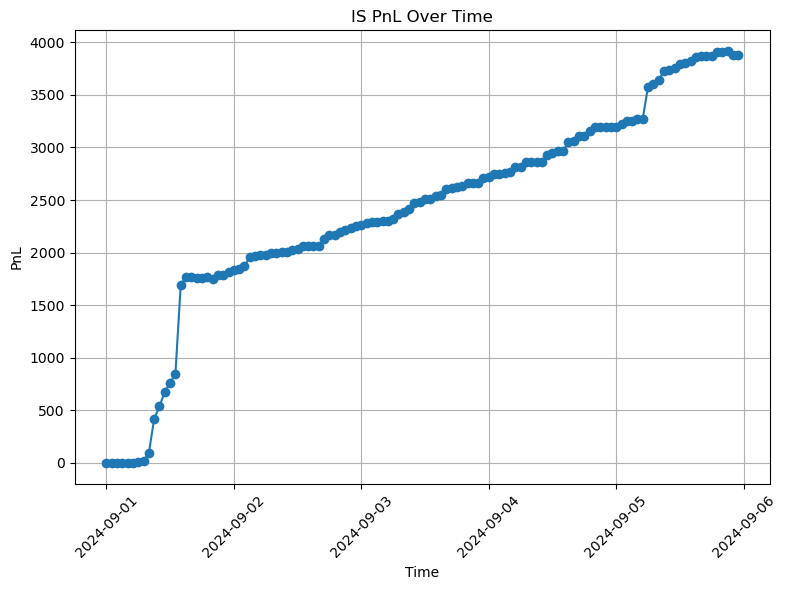

In [459]:
plt.figure(figsize=(8, 6))
plt.plot(merged_backtest['StartTime'], merged_backtest['PnL'], marker='o')
plt.title('IS PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid()
plt.tight_layout()
plt.show()

# OS Test

In [453]:
merged_os

,StartTime,Price(GBP/MWh)_x,Price Change (%)_x,Rolling Std Dev_x,datetime,Price(GBP/MWh)_y,Price Change (%)_y,Rolling Std Dev_y,date,Moving_Avg,Upper_Band,Lower_Band,signals,PnL
120,2024-09-06 00:00:00,100.000000,0.000000,20.816030,2024-09-06 00:00:00,31.72,-4.486600,1.270101,2024-09-06,NaN,NaN,NaN,0,0.000000
121,2024-09-06 01:00:00,75.855000,-24.145000,13.940122,2024-09-06 01:00:00,26.84,-15.384615,5.719936,2024-09-06,NaN,NaN,NaN,0,0.000000
122,2024-09-06 02:00:00,42.955000,-43.372223,21.732529,2024-09-06 02:00:00,24.92,-7.153502,5.680820,2024-09-06,NaN,NaN,NaN,0,0.000000
123,2024-09-06 03:00:00,17.805000,-58.549645,17.242002,2024-09-06 03:00:00,24.12,-3.210273,6.211748,2024-09-06,NaN,NaN,NaN,0,0.000000
124,2024-09-06 04:00:00,97.250000,446.194889,287.133348,2024-09-06 04:00:00,24.58,1.907131,4.542979,2024-09-06,-5.665572,-5.188789,-6.142355,0,0.000000
125,2024-09-06 05:00:00,100.000000,2.827763,275.411401,2024-09-06 05:00:00,25.25,2.725793,3.217010,2024-09-06,-4.223093,-3.541645,-4.904542,0,0.000000
126,2024-09-06 06:00:00,118.000000,18.000000,251.712623,2024-09-06 06:00:00,30.10,19.207921,9.760875,2024-09-06,2.695414,7.497394,-2.106566,0,0.000000
127,2024-09-06 07:00:00,115.950000,-1.737288,10.332771,2024-09-06 07:00:00,32.96,9.501661,8.284367,2024-09-06,6.026447,8.401862,3.651031,0,0.000000
128,2024-09-06 08:00:00,119.575000,3.126348,10.283004,2024-09-06 08:00:00,37.09,12.530340,4.966126,2024-09-06,9.174569,12.307154,6.041984,-1,3.126348
129,2024-09-06 09:00:00,109.250000,-8.634748,5.909784,2024-09-06 09:00:00,38.74,4.448638,4.082888,2024-09-06,9.682871,10.795030,8.570711,-1,-5.508401


In [456]:
# Calculate the 3-period moving average of the day-ahead price changes
merged_os['Moving_Avg'] = merged_os['Price Change (%)_y'].rolling(window=5).mean()
std_dev_fraction = 0.25
merged_os['Upper_Band'] = merged_os['Moving_Avg'] + std_dev_fraction * merged_os['Price Change (%)_y']
merged_os['Lower_Band'] = merged_os['Moving_Avg'] - std_dev_fraction * merged_os['Price Change (%)_y']

# Initialize signals
signals = []

for i in range(len(merged_os)):
    if i < 3:  # Skip the first 2 entries where moving average is not available
        signals.append(0)  # No signal when there's not enough data
    else:
        if merged_os['Price Change (%)_x'].iloc[i] < merged_os['Lower_Band'].iloc[i]:
            signals.append(1)  # Buy signal
        elif merged_os['Price Change (%)_x'].iloc[i] > merged_os['Upper_Band'].iloc[i]:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)  # Hold signal

# Add signals to the DataFrame
merged_os['signals'] = signals

# Display the updated DataFrame with moving average and signals
print(merged_os[['Price Change (%)_x', 'Moving_Avg', 'signals']].head(10))


     Price Change (%)_x  Moving_Avg  signals
120            0.000000         NaN        0
121          -24.145000         NaN        0
122          -43.372223         NaN        0
123          -58.549645         NaN        0
124          446.194889   -5.665572       -1
125            2.827763   -4.223093       -1
126           18.000000    2.695414       -1
127           -1.737288    6.026447        1
128            3.126348    9.174569        1
129           -8.634748    9.682871        1


/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/629238185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_os['Moving_Avg'] = merged_os['Price Change (%)_y'].rolling(window=5).mean()
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/629238185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_os['Upper_Band'] = merged_os['Moving_Avg'] + std_dev_fraction * merged_os['Price Change (%)_y']
/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/629238185.

In [457]:
# Initialize PnL column
initial_capital = 100000
capital = initial_capital
merged_os['PnL'] = 0.0

# Calculate PnL
for index, row in merged_os.iterrows():
    price = row['Price Change (%)_x']
    signal = row['signals']
    
    if signal == 1:
        capital -= price  # Deduct the price from capital for the buy
    elif signal == -1:
        capital += price  # Add the price to capital for the sell
    # For 'hold', do nothing

    # Calculate the PnL
    merged_os.at[index, 'PnL'] = capital - initial_capital

# Display the DataFrame with PnL
merged_os.tail()

/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1209/4291040449.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_os['PnL'] = 0.0


,StartTime,Price(GBP/MWh)_x,Price Change (%)_x,Rolling Std Dev_x,datetime,Price(GBP/MWh)_y,Price Change (%)_y,Rolling Std Dev_y,date,Moving_Avg,Upper_Band,Lower_Band,signals,PnL
163,2024-09-07 19:00:00,64.00,-50.000000,44.752088,2024-09-07 19:00:00,44.27,2.453136,44.967641,2024-09-07,124.071678,124.684962,123.458394,1,954.379352
164,2024-09-07 20:00:00,64.05,0.078125,25.150993,2024-09-07 20:00:00,43.82,-1.016490,5.945479,2024-09-07,108.088564,107.834441,108.342686,1,954.301227
165,2024-09-07 21:00:00,63.96,-0.140515,28.849710,2024-09-07 21:00:00,43.30,-1.186673,2.054080,2024-09-07,18.979434,18.682766,19.276103,1,954.441742
166,2024-09-07 22:00:00,73.99,15.681676,9.072489,2024-09-07 22:00:00,44.19,2.055427,1.824685,2024-09-07,2.574693,3.088550,2.060836,-1,970.123418
167,2024-09-07 23:00:00,78.39,5.946750,7.980866,2024-09-07 23:00:00,39.47,-10.681150,6.619122,2024-09-07,-1.675150,-4.345437,0.995138,-1,976.070168


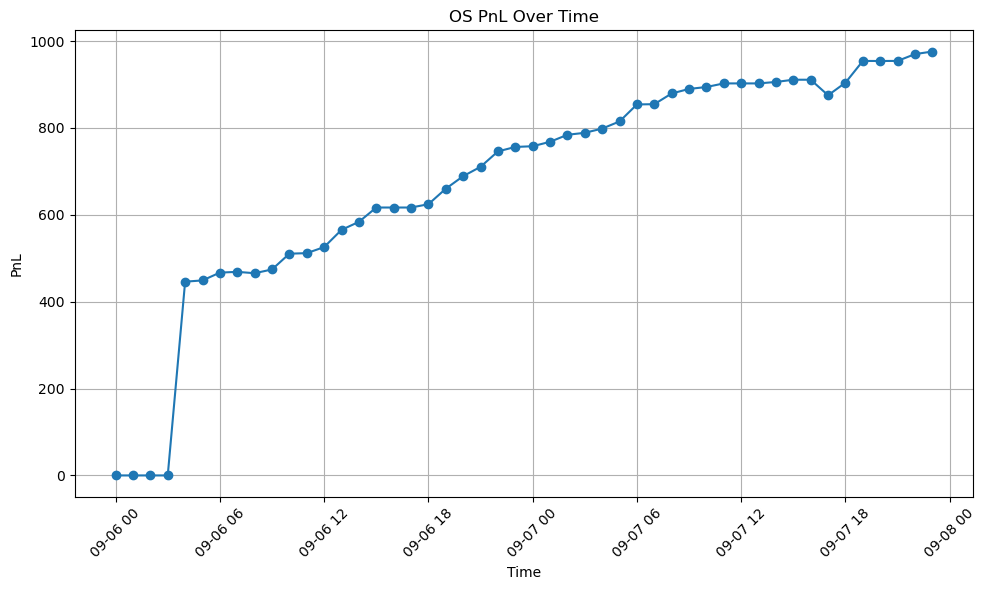

In [458]:
plt.figure(figsize=(10, 6))
plt.plot(merged_os['StartTime'], merged_os['PnL'], marker='o')
plt.title('OS PnL Over Time')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid()
plt.tight_layout()
plt.show()

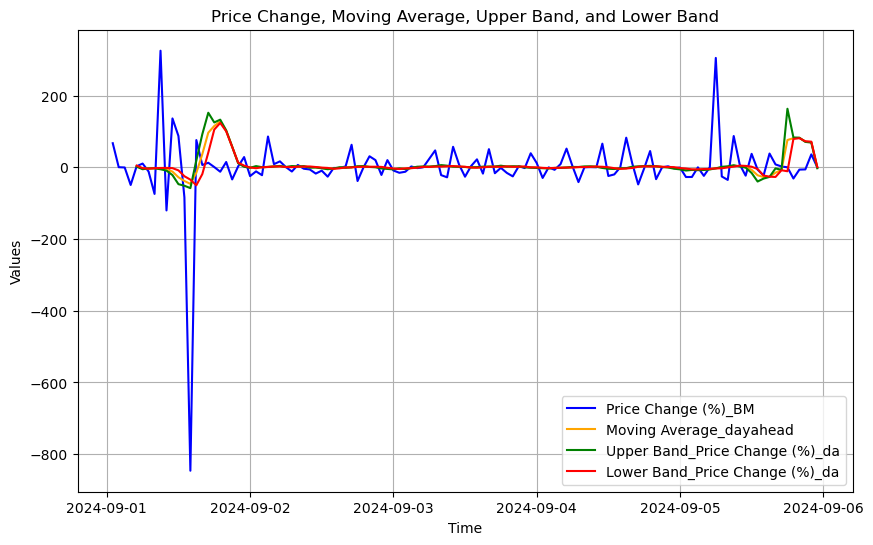

In [447]:


# Create a new figure
plt.figure(figsize=(10, 6))

# Plot Price Change (%)_x
plt.plot(merged_backtest['StartTime'], merged_backtest['Price Change (%)_x'], label='Price Change (%)_BM', color='blue')

# Plot Moving Average
plt.plot(merged_backtest['StartTime'], merged_backtest['Moving_Avg'], label='Moving Average_dayahead ', color='orange')

# Plot Upper Band
plt.plot(merged_backtest['StartTime'], merged_backtest['Upper_Band'], label='Upper Band_Price Change (%)_da', color='green')

# Plot Lower Band
plt.plot(merged_backtest['StartTime'], merged_backtest['Lower_Band'], label='Lower Band_Price Change (%)_da', color='red')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Price Change, Moving Average, Upper Band, and Lower Band')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [211]:
correlation = merged_df[['Rolling Std Dev_x', 'Rolling Std Dev_y']].corr().iloc[0, 1]
print(f'Correlation between BM and Day-Ahead Rolling Std Dev: {correlation}')

Correlation between BM and Day-Ahead Rolling Std Dev: 0.12115978700660603


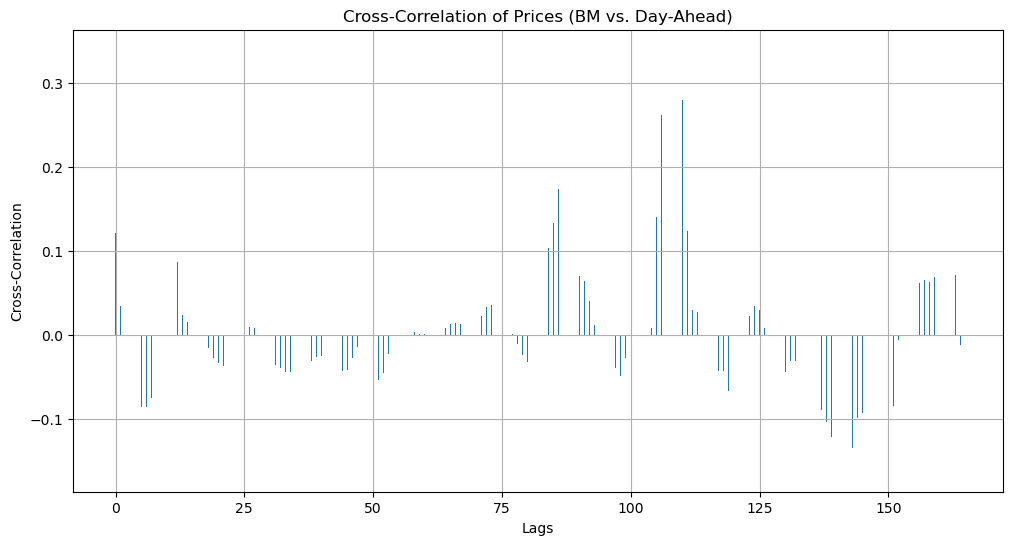

In [212]:
combined_std = bmdata_hourly[['Rolling Std Dev']].merge(dayahead[['Rolling Std Dev']], left_index=True, right_index=True, suffixes=('_BM', '_DA'))

# Drop any rows with NaN values
combined_std = combined_std.dropna()
#combined_std
# # Compute cross-correlation
cross_corr = sm.tsa.stattools.ccf(combined_std['Rolling Std Dev_BM'], combined_std['Rolling Std Dev_DA'])

# Select a range of lags to display
lags = np.arange(len(cross_corr))

# Plot cross-correlation
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(lags, cross_corr, width=0.1)
plt.title('Cross-Correlation of Prices (BM vs. Day-Ahead)')
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.grid()
plt.show()

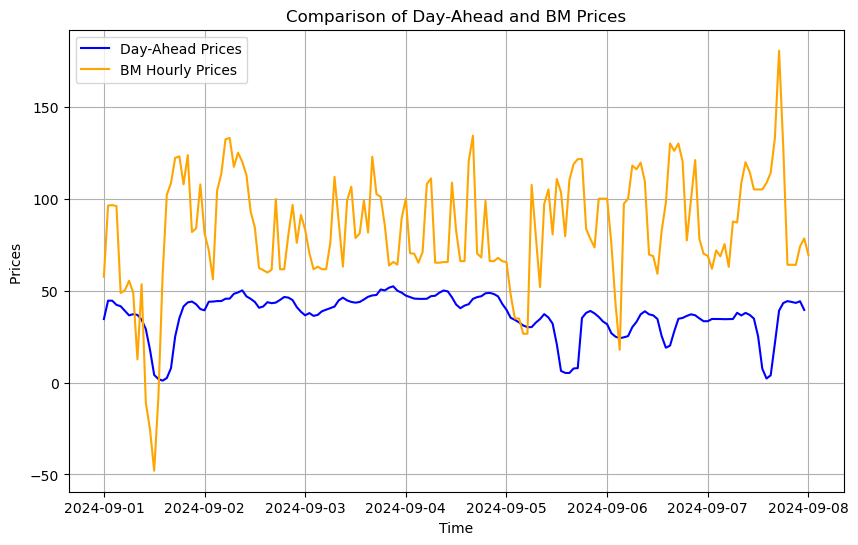

In [178]:
# Create the first plot for rolling standard deviations
plt.figure(figsize=(10, 6))
plt.plot(dayahead['datetime'], dayahead['Price(GBP/MWh)'], label='Day-Ahead Prices', color='blue')
plt.plot(bmdata_hourly['StartTime'], bmdata_hourly['Price(GBP/MWh)'], label='BM Hourly Prices', color='orange')

# Set titles and labels
plt.title('Comparison of Day-Ahead and BM Prices')
plt.xlabel('Time')
plt.ylabel('Prices ')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


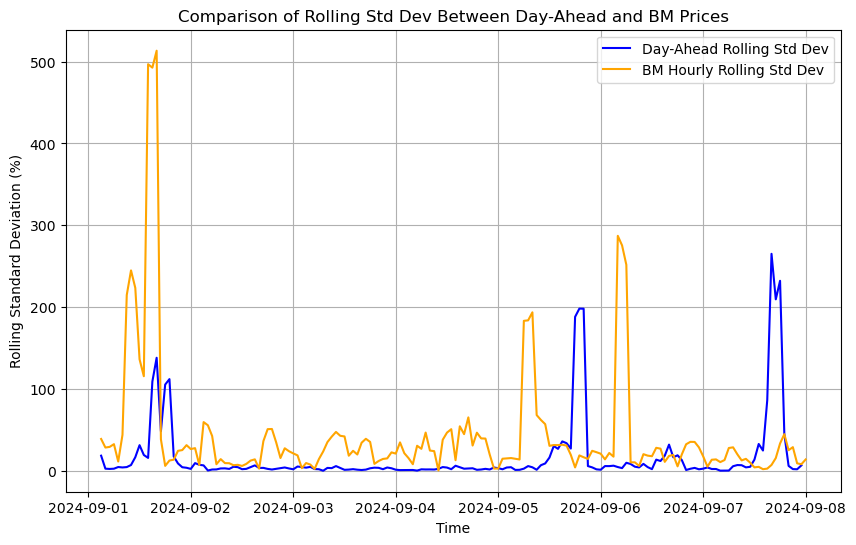

In [179]:
# Create the first plot for rolling standard deviations
plt.figure(figsize=(10, 6))
plt.plot(dayahead['datetime'], dayahead['Rolling Std Dev'], label='Day-Ahead Rolling Std Dev', color='blue')
plt.plot(bmdata_hourly['StartTime'], bmdata_hourly['Rolling Std Dev'], label='BM Hourly Rolling Std Dev', color='orange')

# Set titles and labels
plt.title('Comparison of Rolling Std Dev Between Day-Ahead and BM Prices')
plt.xlabel('Time')
plt.ylabel('Rolling Standard Deviation (%)')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


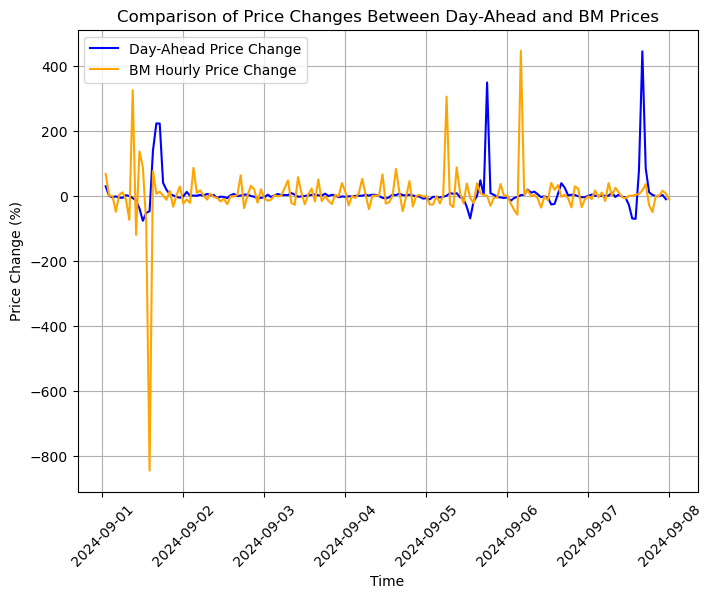

In [461]:
# Create the second plot for price changes
plt.figure(figsize=(8, 6))
plt.plot(dayahead['datetime'], dayahead['Price Change (%)'], label='Day-Ahead Price Change', color='blue')
plt.plot(bmdata_hourly['StartTime'], bmdata_hourly['Price Change (%)'], label='BM Hourly Price Change', color='orange')

# Set titles and labels
plt.title('Comparison of Price Changes Between Day-Ahead and BM Prices')
plt.xlabel('Time')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [181]:
bmdata_hourly['StartTime'].dtype

dtype('<M8[ns]')

In [182]:
bmdata_hourly['Date'] = bmdata_hourly['StartTime'].dt.date

# Step 2: Group the data by date
groupedbm = bmdata_hourly.groupby('Date').agg(
    max_rolling_std=('Rolling Std Dev', 'max'),  # Max rolling std dev
    min_rolling_std=('Rolling Std Dev', 'min'),  # Mean rolling std dev
    avg_rolling_std=('Rolling Std Dev', 'mean'),  # Average (mean) rolling std dev
    
    max_price_change=('Price Change (%)', 'max'),  # Max price change
    min_price_change=('Price Change (%)', 'min'),  # Mean price change
    avg_price_change=('Price Change (%)', 'mean')  # Average (mean) price change
).reset_index()
# Step 2: Find timestamps for max and min rolling standard deviations
groupedbm['max_std_timestamp'] = groupedbm['Date'].apply(
    lambda x: bmdata_hourly.loc[bmdata_hourly['Date'] == x, 'Rolling Std Dev'].idxmax()
)
groupedbm['min_std_timestamp'] = groupedbm['Date'].apply(
    lambda x: bmdata_hourly.loc[bmdata_hourly['Date'] == x, 'Rolling Std Dev'].idxmin()
)

# Step 3: Get the actual timestamps
groupedbm['max_std_timestamp'] = groupedbm.apply(
    lambda row: bmdata_hourly.loc[row['max_std_timestamp'], 'StartTime'], axis=1
)
groupedbm['min_std_timestamp'] = groupedbm.apply(
    lambda row: bmdata_hourly.loc[row['min_std_timestamp'], 'StartTime'], axis=1
)

# Display the resulting DataFrame
groupedbm[['Date', 'max_rolling_std','max_std_timestamp', 'min_rolling_std','min_std_timestamp', 'avg_rolling_std']]

,Date,max_rolling_std,max_std_timestamp,min_rolling_std,min_std_timestamp,avg_rolling_std
0,2024-09-01,513.340991,2024-09-01 16:00:00,5.975836,2024-09-01 18:00:00,132.055259
1,2024-09-02,59.463507,2024-09-02 03:00:00,2.599481,2024-09-02 16:00:00,23.182876
2,2024-09-03,47.465247,2024-09-03 10:00:00,2.247522,2024-09-03 05:00:00,23.025457
3,2024-09-04,65.246168,2024-09-04 17:00:00,0.278181,2024-09-04 10:00:00,31.037574
4,2024-09-05,193.622793,2024-09-05 08:00:00,2.716711,2024-09-05 00:00:00,45.851568
5,2024-09-06,287.133348,2024-09-06 04:00:00,5.404942,2024-09-06 18:00:00,51.309074
6,2024-09-07,44.752088,2024-09-07 19:00:00,1.924501,2024-09-07 14:00:00,15.520553
7,2024-09-08,13.844433,2024-09-08 00:00:00,13.844433,2024-09-08 00:00:00,13.844433


In [183]:
# Step 1: Create a new column for the date
dayahead['date'] = dayahead['datetime'].dt.date

# Step 2: Group the data by date and calculate the statistics
grouped = dayahead.groupby('date').agg(
    max_rolling_std=('Rolling Std Dev', 'max'),
    min_rolling_std=('Rolling Std Dev', 'min'),
    avg_rolling_std=('Rolling Std Dev', 'mean'),
    max_price_change=('Price Change (%)', 'max'),
    min_price_change=('Price Change (%)', 'min'),
    avg_price_change=('Price Change (%)', 'mean')
).reset_index()

# Step 3: Find timestamps for max and min rolling standard deviations
grouped['max_std_timestamp'] = grouped['date'].apply(
    lambda x: dayahead.loc[dayahead['date'] == x, 'Rolling Std Dev'].idxmax()
)
grouped['min_std_timestamp'] = grouped['date'].apply(
    lambda x: dayahead.loc[dayahead['date'] == x, 'Rolling Std Dev'].idxmin()
)

# Step 4: Get the actual timestamps
grouped['max_std_timestamp'] = grouped.apply(
    lambda row: dayahead.loc[row['max_std_timestamp'], 'datetime'], axis=1
)
grouped['min_std_timestamp'] = grouped.apply(
    lambda row: dayahead.loc[row['min_std_timestamp'], 'datetime'], axis=1
)

# Display the resulting DataFrame with the new columns
grouped[['date', 'max_rolling_std','max_std_timestamp', 'min_rolling_std','min_std_timestamp', 'avg_rolling_std']]


,date,max_rolling_std,max_std_timestamp,min_rolling_std,min_std_timestamp,avg_rolling_std
0,2024-09-01,138.090677,2024-09-01 16:00:00,2.241102,2024-09-01 05:00:00,32.181691
1,2024-09-02,9.335094,2024-09-02 01:00:00,0.308388,2024-09-02 04:00:00,3.536078
2,2024-09-03,5.715193,2024-09-03 10:00:00,0.048298,2024-09-03 07:00:00,2.808858
3,2024-09-04,6.138995,2024-09-04 14:00:00,0.219376,2024-09-04 05:00:00,2.232723
4,2024-09-05,198.165967,2024-09-05 19:00:00,1.021248,2024-09-05 04:00:00,33.786572
5,2024-09-06,31.954517,2024-09-06 16:00:00,0.935047,2024-09-06 20:00:00,8.397733
6,2024-09-07,265.139268,2024-09-07 16:00:00,0.126251,2024-09-07 04:00:00,40.224439
